# FINAL EXAM- MACHINE LEARNING

1. Exploratory Data Analysis (15 points)
2. Data Preprocessing & Feature Engineering (15 Points)
3. Base Models(10 Points)
4. Automated Hyperparameter Optimization (10 Points)
5. Stacking & Ensemble Learning (20 Points)
6. Prediction for a New Observation (20 Points)
7. Scores (10 Points)

### Import Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import xgboost
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, validation_curve, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier

pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)
pd.set_option('display.width', 700)
warnings.simplefilter(action='ignore', category=Warning)

### Read Dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
def drop_columns(dataframe, columns):
    
    dataframe.drop(columns, axis=1, inplace=True)
    print(dataframe.head(), end="\n\n\n")

In [6]:
drop_columns(df_train, ["PassengerId", "Name", "Ticket", "Cabin"])
drop_columns(df_test, ["PassengerId", "Name", "Ticket", "Cabin"])

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S




### Exploratory Data Analysis

In [7]:
def quick_check_data(dataframe, nRows):
    
    print("################### SHAPE ###################")
    print(dataframe.shape, end='\n\n\n')
    
    print("################### INFO ###################")
    print(dataframe.info(), end='\n\n\n')
    
    print("################### UNIQUE COUNTS ###################")
    for col in dataframe.columns:
        print(f"   {col} - {dataframe[col].nunique()}", end='\n')
    print(end='\n\n')
    
    print("################### NULL COUNT ###################")
    print(dataframe.isnull().sum(), end='\n\n\n')
    
    print("################### DESCRIBE ###################")
    print(dataframe.describe([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]).T, end='\n\n\n')
    

In [8]:
quick_check_data(df_train, 5)

################### SHAPE ###################
(891, 8)


################### INFO ###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


################### UNIQUE COUNTS ###################
   Survived - 2
   Pclass - 3
   Sex - 2
   Age - 88
   SibSp - 7
   Parch - 7
   Fare - 248
   Embarked - 3


################### NULL COUNT ###################
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embark

In [9]:
quick_check_data(df_test, 5)

################### SHAPE ###################
(418, 7)


################### INFO ###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB
None


################### UNIQUE COUNTS ###################
   Pclass - 3
   Sex - 2
   Age - 79
   SibSp - 7
   Parch - 8
   Fare - 169
   Embarked - 3


################### NULL COUNT ###################
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


################### DESCRIBE ###################
    

In [10]:
def fill_null_values(dataframe, columns):
    
    for col in columns:
        dataframe[col].fillna(dataframe[~dataframe[col].isna()][col].sort_values()[len(dataframe[~dataframe[col].isna()][col])//2-1],inplace=True)
    
    print("################### DATA INFO ###################", end="\n\n")
    print(dataframe.info(), end="\n\n")
    print("###################  NULL VALUES ###################", end="\n\n")
    print(dataframe.isna().sum())

In [11]:
fill_null_values(df_train, ["Age", "Embarked"])

################### DATA INFO ###################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None

###################  NULL VALUES ###################

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [12]:
fill_null_values(df_test, ["Age", "Fare"])

################### DATA INFO ###################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB
None

###################  NULL VALUES ###################

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [13]:
def define_data_types(dataframe, nCategory):
    cat_values = [val for val in dataframe.columns if str(dataframe[val].dtypes) in ["category", "object", "bool"] and dataframe[val].nunique() <= nCategory]
    not_int_values = [val for val in dataframe.columns if str(dataframe[val].dtypes) in ["int64", "float64"] and dataframe[val].nunique() <= nCategory]
    cat_values = cat_values + not_int_values
    
    int_values = [val for val in dataframe.columns if val not in cat_values]
    not_cat_values = [val for val in dataframe.columns if str(dataframe[val].dtypes) in ["category", "object", "bool"] and dataframe[val].nunique() > nCategory and val not in int_values]
    int_values = int_values + not_cat_values
    
    print("################### PANDAS DATA INFO ###################")
    print(dataframe.info(), end='\n\n')
    
    print("################### UNIQUE COUNTS ###################")
    for col in dataframe.columns:
        print(f"   {col} - {dataframe[col].nunique()}", end='\n')
    print(end='\n')
    
    print("################### CATEGORICAL DATA TYPES ###################")
    print(cat_values, end='\n\n')
    
    print("################### NUMERICAL DATA TYPES ###################")
    print(int_values, end='\n\n')
    
    print("################### STATISTICS DATA SHOW ###################")
    print("Columns: ", len(dataframe.columns))
    print("Category: ", len(cat_values))
    print("Number: ", len(int_values))
    print("Not Cat: ", len(not_cat_values))
    print("Not Num: ", len(not_int_values))
    
    return cat_values, int_values

In [14]:
category, number = define_data_types(df_train, 10)

################### PANDAS DATA INFO ###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None

################### UNIQUE COUNTS ###################
   Survived - 2
   Pclass - 3
   Sex - 2
   Age - 88
   SibSp - 7
   Parch - 7
   Fare - 248
   Embarked - 3

################### CATEGORICAL DATA TYPES ###################
['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

################### NUMERICAL DATA TYPES ###################
['Age', 'Fare']

##############

In [15]:
def categorical_analysis(dataframe, column_names):
    
    pd.options.display.float_format = '{:,.2f}'.format
                                           
    for col in column_names:
        print("#####################################")
        s1 = dataframe[col].value_counts()
        s2 = dataframe[col].value_counts()/len(dataframe[col])
        
        print(pd.concat([s1, s2], names=col, keys=['count', "ratio"], axis=1), end="\n#####################################\n\n")
        

In [16]:
categorical_analysis(df_train, category)

#####################################
Sex     count  ratio
male      577   0.65
female    314   0.35
#####################################

#####################################
Embarked  count  ratio
S           646   0.73
C           168   0.19
Q            77   0.09
#####################################

#####################################
Survived  count  ratio
0           549   0.62
1           342   0.38
#####################################

#####################################
Pclass  count  ratio
3         491   0.55
1         216   0.24
2         184   0.21
#####################################

#####################################
SibSp  count  ratio
0        608   0.68
1        209   0.23
2         28   0.03
4         18   0.02
3         16   0.02
8          7   0.01
5          5   0.01
#####################################

#####################################
Parch  count  ratio
0        678   0.76
1        118   0.13
2         80   0.09
5          5   0.01
3        

In [17]:
def numerical_analysis(dataframe, column_names):
    
    pd.options.display.float_format = '{:,.1f}'.format
    
    print(dataframe[column_names].describe([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]).T, end='\n\n')
    
    for col in column_names:
        if plt.plot:
            sns.histplot(dataframe[col], kde=True)
            
            plt.title("Histogram of " + col)
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.show()

      count  mean  std  min  0%  5%  25%  50%  75%   95%  100%   max
Age   891.0  28.2 13.4  0.4 0.4 6.0 22.0 24.0 35.0  54.0  80.0  80.0
Fare  891.0  32.2 49.7  0.0 0.0 7.2  7.9 14.5 31.0 112.1 512.3 512.3



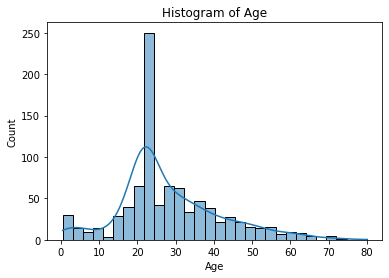

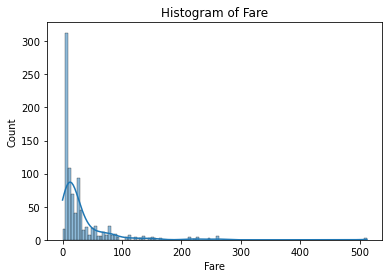

In [18]:
numerical_analysis(df_train, number)

In [19]:
target = "Survived"

In [20]:
def target_analysis_with_catagory(dataframe, cat_types, target):
    
    pd.options.display.float_format = '{:,.2f}'.format
    
    for col in cat_types:
        if col != target:
            print("#####################################")
            print(dataframe.groupby(col)[target].mean(), end="\n#####################################\n\n")

In [21]:
target_analysis_with_catagory(df_train, category, target)

#####################################
Sex
female   0.74
male     0.19
Name: Survived, dtype: float64
#####################################

#####################################
Embarked
C   0.55
Q   0.39
S   0.34
Name: Survived, dtype: float64
#####################################

#####################################
Pclass
1   0.63
2   0.47
3   0.24
Name: Survived, dtype: float64
#####################################

#####################################
SibSp
0   0.35
1   0.54
2   0.46
3   0.25
4   0.17
5   0.00
8   0.00
Name: Survived, dtype: float64
#####################################

#####################################
Parch
0   0.34
1   0.55
2   0.50
3   0.60
4   0.00
5   0.20
6   0.00
Name: Survived, dtype: float64
#####################################



In [22]:
def target_analysis_with_numerical(dataframe, cat_types, target):
    
    pd.options.display.float_format = '{:,.2f}'.format
    
    for col in cat_types:
        if col != target:
            print("################# MEAN ####################")
            print(dataframe.groupby(target).agg({col: "mean"}), end="\n#####################################\n\n")

In [23]:
target_analysis_with_numerical(df_train, number, target)

################# MEAN ####################
           Age
Survived      
0        28.66
1        27.38
#####################################

################# MEAN ####################
          Fare
Survived      
0        22.12
1        48.40
#####################################



#### Replace Lables with Categories

In [24]:
def label_encoding(dataframe, columns):
     
    label_encoder = preprocessing.LabelEncoder() 
    
    for col in columns:
        dataframe[col] = label_encoder.fit_transform(dataframe[col]) 

In [25]:
label_encoding(df_train, ["Sex", "Embarked"])
label_encoding(df_test, ["Sex", "Embarked"])

In [26]:
def correlation_matrix(dataframe,columns):
    fig = plt.gcf()
    fig.set_size_inches(10,8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig=sns.heatmap(dataframe[columns].corr(), annot=True, linewidths = 0.5, annot_kws={'size':12},linecolor='w',cmap='RdBu')
    plt.show(block=True)

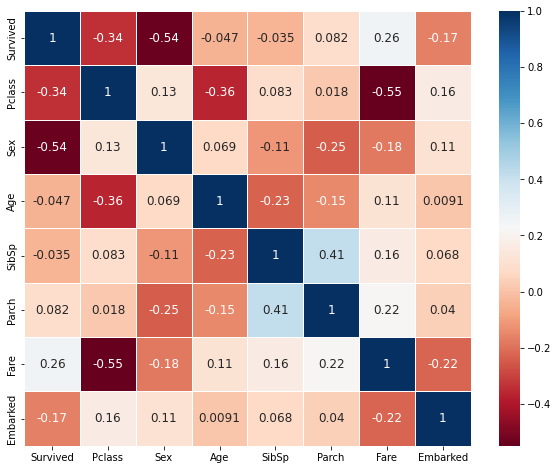

In [27]:
correlation_matrix(df_train, df_train.columns)

### Data Preprocessing & Feature Engineering

#### Drop Week Features

In [28]:
# drop_columns(df_train, ["SibSp"])
# drop_columns(df_test, ["SibSp"])

# category.remove('SibSp')

#### Outlier

In [29]:
def check_outlier(dataframe, columns):
    for col in columns:
        sns.boxplot(x=dataframe[col])
        plt.show()

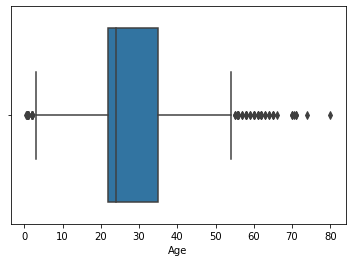

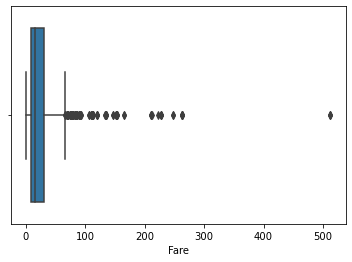

In [30]:
check_outlier(df_train, number)

In [31]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1= dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquartile_range = quartile3-quartile1
    up_limit = quartile3+1.5*interquartile_range
    low_limit = quartile1-1.5*interquartile_range
    return low_limit,up_limit

In [32]:
def replace_with_threshold(dataframe, variable):
    
    for var in variable:
        low_limit,up_limit = outlier_thresholds(dataframe, var)
        dataframe.loc[(dataframe[var]<=low_limit), var] = low_limit
        dataframe.loc[(dataframe[var]>=up_limit), var] = up_limit

In [33]:
replace_with_threshold(df_train, number)

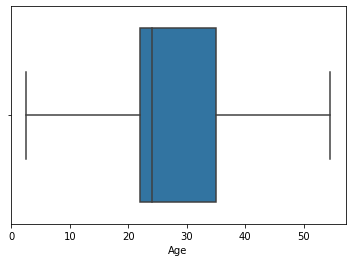

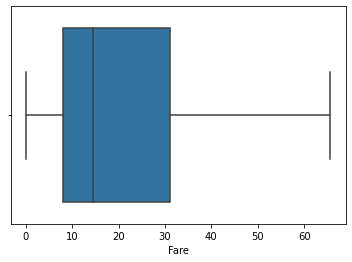

In [34]:
check_outlier(df_train, number)

#### Min-Max Normalize

In [35]:
def normalize(dataframe):
    for col in dataframe.columns:
        max_value = dataframe[col].max()
        min_value = dataframe[col].min()
        dataframe[col] = (dataframe[col] - min_value) / (max_value - min_value)

In [36]:
normalize(df_train)
normalize(df_test)

In [37]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.00,1.00,1.00,0.38,0.12,0.00,0.11,1.00
1,1.00,0.00,0.00,0.68,0.12,0.00,1.00,0.00
2,1.00,1.00,0.00,0.45,0.00,0.00,0.12,1.00
3,1.00,0.00,0.00,0.62,0.12,0.00,0.81,1.00
4,0.00,1.00,1.00,0.62,0.00,0.00,0.12,1.00


In [38]:
y = df_train[target]
X = df_train.drop(target, axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
373,0.00,1.00,0.38,0.00,0.00,1.00,0.00
512,0.00,1.00,0.64,0.00,0.00,0.40,1.00
806,0.00,1.00,0.70,0.00,0.00,0.00,1.00
474,1.00,0.00,0.38,0.00,0.00,0.15,1.00
287,1.00,1.00,0.38,0.00,0.00,0.12,1.00


In [40]:
y_train.head()

373   0.00
512   1.00
806   0.00
474   0.00
287   0.00
Name: Survived, dtype: float64

### Model 

In [41]:
def base_models(X,y, scoring="roc_auc"):
    print("Basel Models.....")
    classifiers = [('LR',LogisticRegression()), ('KNN',KNeighborsClassifier()),("SVC",SVC()),("CART", DecisionTreeClassifier()), ("NB", GaussianNB()),
                  ("RF",RandomForestClassifier()),('Adaboost',AdaBoostClassifier()),('GBM',GradientBoostingClassifier()),('XGBoost',XGBClassifier(use_label_encoder=False, eval_metric='logloss'))]
    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X,y, cv=5, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(),4)} ({name})")

In [42]:
base_models(X_train, y_train, scoring="accuracy")

Basel Models.....
accuracy: 0.7963 (LR)
accuracy: 0.7865 (KNN)
accuracy: 0.8006 (SVC)
accuracy: 0.7878 (CART)
accuracy: 0.764 (NB)
accuracy: 0.7963 (RF)
accuracy: 0.7781 (Adaboost)
accuracy: 0.8033 (GBM)
accuracy: 0.8048 (XGBoost)


### Automated Hyperparameter Optimization

In [43]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

#### Gradient Boosting Classifier Algorithm

In [44]:
gbc = GradientBoostingClassifier()
gbc_parameters = {
    "n_estimators":[5, 50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [45]:
gbc_cv = GridSearchCV(gbc, gbc_parameters, cv=10)
gbc_cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [46]:
display(gbc_cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


0.621 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.782 + or -0.042 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.782 + or -0.042 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.792 + or -0.046 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.621 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.791 + or -0.055 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.817 + or -0.036 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.815 + or -0.038 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.621 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.802 + or -0.047 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.808 + or -0.047 for the {'learning_rate': 0.01, 'max_

In [47]:
gbc_predictions = gbc_cv.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, gbc_predictions))

print("Classification Report")
print(classification_report(y_test, gbc_predictions))

Confusion Matrix:
[[99  8]
 [19 53]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       107
         1.0       0.87      0.74      0.80        72

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



#### CART Algorithm

In [48]:
cart = DecisionTreeClassifier(random_state=17)

In [49]:
cart_parameters = {'max_depth': range(1,11), 
                   'min_samples_split': range(2,20)}

In [50]:
cart_cv = GridSearchCV(cart, cart_parameters, cv=10, n_jobs=-1, verbose=5).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [51]:
display(cart_cv)

Best parameters are: {'max_depth': 7, 'min_samples_split': 14}


0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 2}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 3}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 4}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 5}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 6}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 7}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 8}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 9}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 10}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 11}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 12}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 13}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_split': 14}
0.782 + or -0.042 for the {'max_depth': 1, 'min_samples_spl

In [52]:
cart_predictions = cart_cv.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, cart_predictions))

print("Classification Report")
print(classification_report(y_test, cart_predictions))

Confusion Matrix:
[[100   7]
 [ 15  57]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       107
         1.0       0.89      0.79      0.84        72

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



#### Supported Vector Machine Algorithm

In [53]:
svc = SVC()

In [54]:
# defining parameter range 
scv_parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

svc_cv = GridSearchCV(svc, scv_parameters, refit = True, verbose = 5) 
  
# fitting the model for grid search 
svc_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.783 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.739 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.810 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.790 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.739 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [55]:
display(svc_cv)

Best parameters are: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


0.794 + or -0.046 for the {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.782 + or -0.042 for the {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.621 + or -0.001 for the {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.621 + or -0.001 for the {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.621 + or -0.001 for the {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.801 + or -0.032 for the {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.782 + or -0.042 for the {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.782 + or -0.042 for the {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.621 + or -0.001 for the {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.621 + or -0.001 for the {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.806 + or -0.03 for the {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.801 + or -0.041 for the {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.782 + or -0.042 for the {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.782 + or -0.042 for the {'C': 10, 'gamma': 0.001, 'kern

In [56]:
svc_predictions = svc_cv.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("Classification Report")
print(classification_report(y_test, svc_predictions))

Confusion Matrix:
[[99  8]
 [22 50]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       107
         1.0       0.86      0.69      0.77        72

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



### Final Best Model

In [57]:
final_model = DecisionTreeClassifier(**cart_cv.best_params_).fit(X, y)

In [58]:
final_model_cv = cross_validate(final_model, X,y, cv=20, scoring=["accuracy","f1","roc_auc"])

In [59]:
final_model_cv

{'fit_time': array([0.01161218, 0.01011539, 0.00677657, 0.00305367, 0.00406861,
        0.00818896, 0.00472784, 0.00873423, 0.00471354, 0.00577855,
        0.00620174, 0.00120354, 0.00336409, 0.00509238, 0.        ,
        0.00262523, 0.00681639, 0.00055718, 0.0017457 , 0.00564003]),
 'score_time': array([0.0176034 , 0.0132525 , 0.00793052, 0.0104754 , 0.00831342,
        0.0133636 , 0.00994968, 0.01038241, 0.00502944, 0.00990915,
        0.00890541, 0.01502252, 0.01343083, 0.01038742, 0.01638579,
        0.01403189, 0.01012707, 0.01456285, 0.01328301, 0.01072359]),
 'test_accuracy': array([0.73333333, 0.84444444, 0.84444444, 0.88888889, 0.75555556,
        0.73333333, 0.82222222, 0.93333333, 0.91111111, 0.86666667,
        0.82222222, 0.81818182, 0.75      , 0.88636364, 0.79545455,
        0.77272727, 0.84090909, 0.90909091, 0.81818182, 0.90909091]),
 'test_f1': array([0.6       , 0.74074074, 0.75862069, 0.83870968, 0.62068966,
        0.6       , 0.77777778, 0.90909091, 0.88235294, 

In [60]:
final_model_cv['test_accuracy'].mean()

0.8327777777777777

In [61]:
final_model_cv["test_f1"].mean()

0.7545085021626768

In [62]:
final_model_cv['test_roc_auc'].mean()

0.8429561330705122

#### ROC AUC Curve

In [63]:
train_score, test_score = validation_curve(final_model, X_train,y_train, param_name= "max_depth", param_range=range(1,11), scoring="roc_auc", cv=10)

In [64]:
mean_train_score=np.mean(train_score,axis=1)

In [65]:
mean_test_score=np.mean(test_score,axis=1)

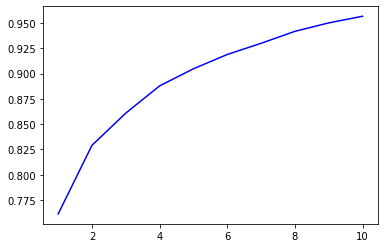

In [66]:
plt.plot(range(1,11),mean_train_score,label="Training Score",color='b')

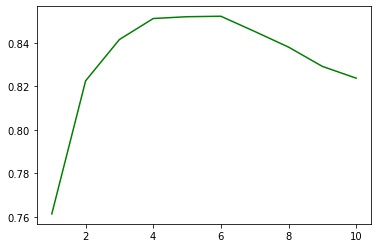

In [67]:
plt.plot(range(1,11),mean_test_score,label="Validation Score",color='g')

### Stacking & Ensemble Learning

In [68]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = XGBClassifier()

classifications = [dtc,rfc,knn,xgb]

for algo in classifications:
    score = cross_val_score( algo, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.7793818466353677
The accuracy score of RandomForestClassifier() is: 0.8075117370892018
The accuracy score of KNeighborsClassifier() is: 0.797672143974961
The accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is: 0.7948943

In [69]:
classificationres = [('decisiontree',dtc),('randomforest',rfc),('knn',knn),('xgb',xgb)] 

lr = LogisticRegression()

stack_model = StackingClassifier( estimators = classificationres,final_estimator = lr)
score = cross_val_score(stack_model, X_train, y_train, cv = 10, scoring = 'accuracy')

print("The accuracy score is:",score.mean())

The accuracy score of is: 0.8061228482003131


### Prediction for a New Observation

In [70]:
predictions_cv = final_model.predict(df_test)

In [71]:
predictions_cv

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

### Output

In [72]:
output = pd.DataFrame({'PassengerId': np.array(pd.read_csv('test.csv').PassengerId).astype(int), 'Survived': np.array(predictions_cv).astype(int)})
output.to_csv('my_output.csv', index=False)
print("The submission was successfully saved!")

Your submission was successfully saved!


### Score

In [ ]:
# The Score is 77.28 % in kaggle submission